In [1]:
import sklearn as sk
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score



import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [33]:
pip install -U scikit-learn

     |████████████████████████████████| 7.1MB 1.1MB/s eta 0:00:01    |                                | 20kB 364kB/s eta 0:00:20     |███▎                            | 727kB 1.1MB/s eta 0:00:07     |████████████████████████▎       | 5.4MB 1.1MB/s eta 0:00:02     |██████████████████████████████  | 6.7MB 1.1MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
df  = pd.read_csv('IIP_2019IcebergSeason.csv')

In [3]:
df1  = pd.read_csv('IIP_2018IcebergSeason.csv')

In [4]:
df2 = pd.read_csv('IIP_2017IcebergSeason.csv')
df3 = pd.read_csv('IIP_2016IcebergSeason.csv')
df4 = pd.read_csv('IIP_2015IcebergSeason.csv')
df5 = pd.read_csv('IIP_2014IcebergSeason.csv')

In [5]:
df2.head()

,ICEBERG_YEAR,ICEBERG_NUMBER,SIGHTING_DATE,SIGHTING_TIME,SIGHTING_LATITUDE,SIGHTING_LONGITUDE,SIGHTING_METHOD,SIZE,SHAPE,SOURCE
0,2017,71,10/1/2016,1459,58.62,-61.43,R/V,MED,WDG,CGDT
1,2017,70,10/1/2016,1530,58.72,-61.03,R/V,MED,PIN,CGDT
2,2017,65,10/2/2016,1335,49.87,-54.66,R/V,SM,PIN,GGAO
3,2017,74,10/25/2016,1445,57.12,-59.86,VIS,GEN,GEN,PCSZ
4,2017,70,10/29/2016,2130,56.51,-59.93,SAT-HIGH,RAD,RAD,RSA2


In [6]:
df.tail()

,ICEBERG_YEAR,ICEBERG_NUMBER,SIGHTING_DATE,SIGHTING_TIME,SIGHTING_LATITUDE,SIGHTING_LONGITUDE,SIGHTING_METHOD,SIZE,SHAPE,SOURCE
24906,2019,354,9/26/2019,2141,56.2850,-59.4583,SAT-LOW,MED,GEN,SN1A
24907,2019,352,9/27/2019,958,53.6633,-54.5750,SAT-HIGH,GEN,GEN,RSA2
24908,2019,353,9/27/2019,958,53.2250,-55.4500,SAT-HIGH,GEN,GEN,RSA2
24909,2019,355,9/27/2019,2123,54.5933,-55.5317,SAT-HIGH,GEN,GEN,RSA2
24910,2019,356,9/27/2019,2123,53.8933,-56.8317,SAT-HIGH,GEN,GEN,RSA2


In [7]:
df_tot = pd.concat([df, df1, df2, df3, df4, df5], sort=False)

In [8]:
df_tot.tail()

,ICEBERG_YEAR,ICEBERG_NUMBER,SIGHTING_DATE,SIGHTING_TIME,SIGHTING_LATITUDE,SIGHTING_LONGITUDE,SIGHTING_METHOD,SIZE,SHAPE,SOURCE,SIGHTING_METHOD
17134,2014,30165,9/19/2014,2116,51.86,-54.36,SAT-HIGH,GEN,GEN,RSA2,NaN
17135,2014,30166,9/19/2014,2116,52.92,-54.71,SAT-HIGH,GEN,GEN,RSA2,NaN
17136,2014,30167,9/25/2014,1221,53.49,-53.03,R/V,SM,GEN,GTJZ,NaN
17137,2014,30168,9/25/2014,1554,49.91,-54.00,R/V,SM,BLK,GTJZ,NaN
17138,2014,30168,9/28/2014,1854,48.63,-52.91,R/V,VLG,GEN,SHIP,NaN


In [9]:
df_tot.tail(20)

,ICEBERG_YEAR,ICEBERG_NUMBER,SIGHTING_DATE,SIGHTING_TIME,SIGHTING_LATITUDE,SIGHTING_LONGITUDE,SIGHTING_METHOD,SIZE,SHAPE,SOURCE,SIGHTING_METHOD
17119,2014,30153,8/20/2014,1135,53.23,-52.83,VIS,MED,DD,GPGR,NaN
17120,2014,30153,8/26/2014,1331,53.10,-52.71,R/V,GEN,GEN,GPGR,NaN
17121,2014,30154,8/20/2014,1138,53.25,-52.64,VIS,SM,DOM,GPGR,NaN
17122,2014,30155,8/20/2014,1238,53.68,-53.25,R/V,MED,GEN,GPGR,NaN
17123,2014,30155,8/26/2014,1331,52.98,-54.12,R/V,SM,DD,GPGR,NaN
17124,2014,30156,8/20/2014,1238,53.69,-53.23,R/V,SM,GEN,GPGR,NaN
17125,2014,30157,8/20/2014,1238,53.91,-53.23,R/V,SM,GEN,GPGR,NaN
17126,2014,30158,8/20/2014,1238,53.96,-53.95,R/V,LG,GEN,GPGR,NaN
17127,2014,30159,8/20/2014,1238,52.80,-55.47,R/V,SM,GEN,GPGR,NaN
17128,2014,30160,8/26/2014,1816,50.77,-55.71,R/V,GEN,GEN,GPGR,NaN


In [10]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85850 entries, 0 to 17138
Data columns (total 11 columns):
ICEBERG_YEAR          85850 non-null int64
ICEBERG_NUMBER        85850 non-null int64
SIGHTING_DATE         85850 non-null object
SIGHTING_TIME         85850 non-null int64
SIGHTING_LATITUDE     85850 non-null float64
SIGHTING_LONGITUDE    85850 non-null float64
SIGHTING_METHOD       79323 non-null object
SIZE                  85850 non-null object
SHAPE                 85850 non-null object
SOURCE                85850 non-null object
 SIGHTING_METHOD      6527 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 7.9+ MB


In [11]:
df_tot.describe()

,ICEBERG_YEAR,ICEBERG_NUMBER,SIGHTING_TIME,SIGHTING_LATITUDE,SIGHTING_LONGITUDE
count,85850.000000,85850.000000,85850.000000,85850.000000,85850.00000
mean,2016.612324,23000.015620,1466.747676,51.213742,-53.37772
std,1.910785,4112.971583,385.583602,3.470922,3.75669
min,2014.000000,1.000000,0.000000,41.110000,-68.09000
25%,2015.000000,21021.000000,1139.000000,48.380000,-55.69000
50%,2017.000000,22648.000000,1503.000000,50.640000,-53.24000
75%,2019.000000,25371.000000,1757.000000,53.980000,-50.77000
max,2019.000000,30168.000000,2357.000000,61.466700,-41.57000


In [12]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85850 entries, 0 to 17138
Data columns (total 11 columns):
ICEBERG_YEAR          85850 non-null int64
ICEBERG_NUMBER        85850 non-null int64
SIGHTING_DATE         85850 non-null object
SIGHTING_TIME         85850 non-null int64
SIGHTING_LATITUDE     85850 non-null float64
SIGHTING_LONGITUDE    85850 non-null float64
SIGHTING_METHOD       79323 non-null object
SIZE                  85850 non-null object
SHAPE                 85850 non-null object
SOURCE                85850 non-null object
 SIGHTING_METHOD      6527 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 7.9+ MB


In [13]:
df_tot = df_tot.assign(outcome=(df_tot['SIGHTING_LATITUDE'] >= 60).astype(int))

In [14]:
df_tot.tail(20)

,ICEBERG_YEAR,ICEBERG_NUMBER,SIGHTING_DATE,SIGHTING_TIME,SIGHTING_LATITUDE,SIGHTING_LONGITUDE,SIGHTING_METHOD,SIZE,SHAPE,SOURCE,SIGHTING_METHOD,outcome
17119,2014,30153,8/20/2014,1135,53.23,-52.83,VIS,MED,DD,GPGR,NaN,0
17120,2014,30153,8/26/2014,1331,53.10,-52.71,R/V,GEN,GEN,GPGR,NaN,0
17121,2014,30154,8/20/2014,1138,53.25,-52.64,VIS,SM,DOM,GPGR,NaN,0
17122,2014,30155,8/20/2014,1238,53.68,-53.25,R/V,MED,GEN,GPGR,NaN,0
17123,2014,30155,8/26/2014,1331,52.98,-54.12,R/V,SM,DD,GPGR,NaN,0
17124,2014,30156,8/20/2014,1238,53.69,-53.23,R/V,SM,GEN,GPGR,NaN,0
17125,2014,30157,8/20/2014,1238,53.91,-53.23,R/V,SM,GEN,GPGR,NaN,0
17126,2014,30158,8/20/2014,1238,53.96,-53.95,R/V,LG,GEN,GPGR,NaN,0
17127,2014,30159,8/20/2014,1238,52.80,-55.47,R/V,SM,GEN,GPGR,NaN,0
17128,2014,30160,8/26/2014,1816,50.77,-55.71,R/V,GEN,GEN,GPGR,NaN,0


### Creating baseline model

In [15]:
iceberg = df_tot[['ICEBERG_YEAR','ICEBERG_NUMBER','SIGHTING_LATITUDE', 'outcome']].copy()

In [16]:
iceberg.tail()

,ICEBERG_YEAR,ICEBERG_NUMBER,SIGHTING_LATITUDE,outcome
17134,2014,30165,51.86,0
17135,2014,30166,52.92,0
17136,2014,30167,53.49,0
17137,2014,30168,49.91,0
17138,2014,30168,48.63,0


In [17]:
iceberg['outcome'].value_counts()

0    85385
1      465
Name: outcome, dtype: int64

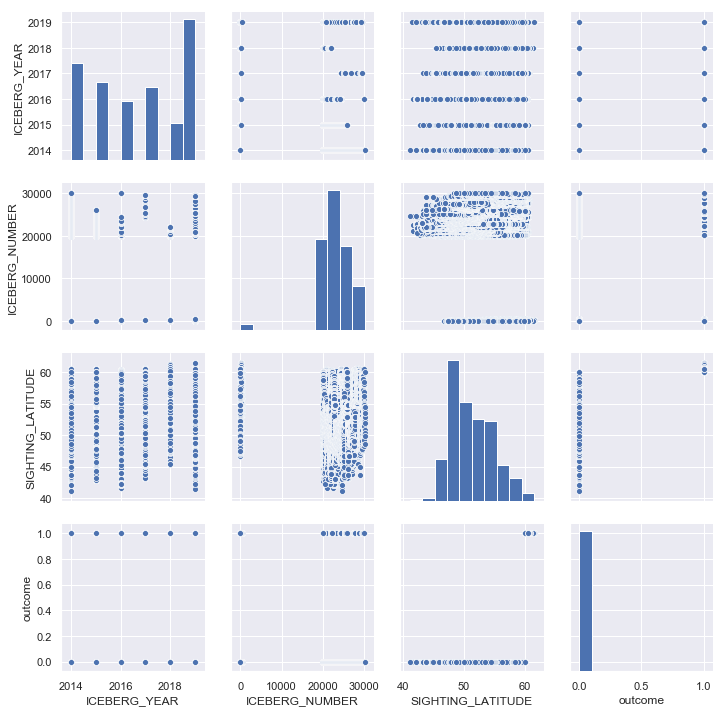

In [18]:
sns.pairplot(iceberg)

###Creating test, train, and valid data sets

In [20]:
### Modelless baseline.  Is at 0.5%, not great.

#baseline=1 - df_tot['outcome'].mean()
print(df_tot['outcome'].mean())

0.005416423995340711


In [22]:
y = iceberg.outcome
X = iceberg.drop(['outcome'] , axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45)

In [24]:
"""
Logistic Regression

"""

scaler = MinMaxScaler()
lr = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear') # LASSO in the LogReg
pipe = make_pipeline(scaler, lr)

pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

/Users/lenaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
scaler = RobustScaler()
clf_lr = LogisticRegression()

pipe_lr = make_pipeline(scaler, clf_lr)

pipe_lr.fit(X_train, y_train)

train_preds = pipe_lr.predict_proba(X_train)
test_preds = pipe_lr.predict_proba(X_test)

train_score = roc_auc_score(y_train, train_preds)
test_score = roc_auc_score(y_test, test_preds)

print(f"Train ROC-AUC: {train_score}")
print(f"Test ROC-AUC: {test_score}")

ValueError: bad input shape (47217, 2)

In [25]:
print("TRAIN:")
print(confusion_matrix(y_train, train_preds))
print('')
print("TEST:")
print(confusion_matrix(y_test, test_preds))

TRAIN:
[[46135   836]
 [    0   246]]

TEST:
[[37696   718]
 [    0   219]]


In [26]:
print("Accuracy:"); print("="*len("Accuracy:"))
print("TRAIN:", accuracy_score(y_train, train_preds))
print("TEST:", accuracy_score(y_test, test_preds))

Accuracy:
TRAIN: 0.9822945125696253
TEST: 0.9814148525871664


In [27]:
train_preds = pipe.predict_proba(X_train)[:,1]
test_preds = pipe.predict_proba(X_test)[:,1]

print("AUC:"); print("="*len("AUC:"))
print("TRAIN:", roc_auc_score(y_train, train_preds))
print("TEST:", roc_auc_score(y_test, test_preds))

AUC:
====
TRAIN: 0.9999036769444146
TEST: 0.9998818448277871


In [35]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve

from sklearn.svm import SVC

rf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                            criterion='entropy', max_depth=10, max_features=3,
                            min_samples_leaf=3, min_samples_split=3,
                            n_estimators=50, n_jobs=-1, random_state=50)

In [30]:
"""

This cross validation score seems to give a more realistic value.

"""
svm = SVC(probability=True, class_weight='balanced', random_state=42)

scores = cross_val_score(svm, X, y, cv=2, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.6053642529661193 +/- 0.09398459127563785


In [31]:
scores_1 = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')
print(scores_1.mean(), "+/-", scores_1.std())

0.9999997481363666 +/- 5.037272669206061e-07


Below is a Gradient Boosting Classifer

In [32]:
clf = GradientBoostingClassifier(n_estimators=2000,
                                 learning_rate=0.1, random_state=50, 
                                 subsample=0.9, max_depth=5, max_features=3,
                                 min_samples_leaf=2, min_samples_split=3,
                                 validation_fraction=0.20, # use 20% of the data as hold-out for early stopping
                                 n_iter_no_change=50, # allowed to go 50 iterations without improvement to hold-out score
                                 verbose=0)

scores_2 = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
print(scores_2.mean(), "+/-", scores_2.std())



0.9999941441705218 +/- 1.1711658956459204e-05


ValueError: DataFrame should be a binary classifier

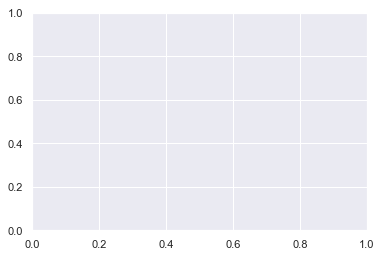

In [37]:
fig, ax = plt.subplots()
plot_roc_curve(iceberg, X_test, y_test, name="test", ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
ax.legend()
plt.show()